<center style='font-size:32px; margin-top:40px'>Introduction to Image Processing and Computer Vision</center>

<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## 项目背景
- 与欧莱雅合作的口红色号提取项目
- 需要识别出口红颜色的RGB值

## 环境与工具库
- Python3
- Jupyter Notebook (ipynb)
- [opencv-python](https://pypi.org/project/opencv-python/)
- numpy
- matplotlib
- [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/)

## 什么是“数字图像”？
- 像素点的集合
- 离散的信号
- 三维矩阵
- 映射关系
$ R^{2}(x,y) \arrow R^{3}(r,g,b) $ 或 $ R^{3}(x,y,t) => R^{3}(r,g,b) $

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
image = cv2.imread('images/fellow.jpg')

In [4]:
image.shape

(600, 800, 3)

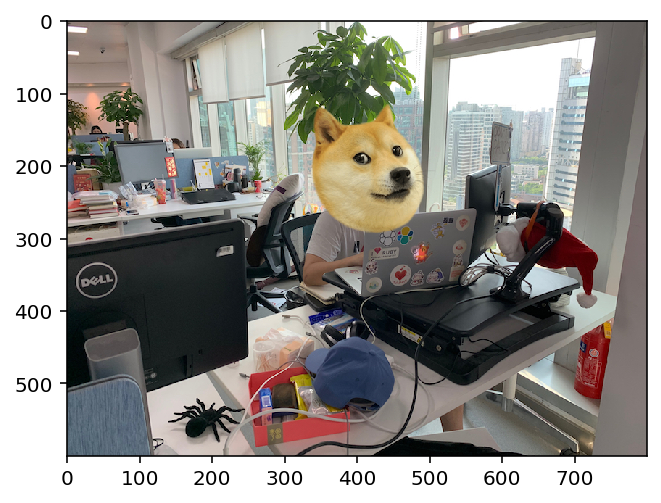

In [5]:
def show_BGR_image(image, ax=plt):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
    
def show_HSV_image(image, ax=plt):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB));
    
    
def show_HLS_image(image, ax=plt):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_HLS2RGB));
    
show_BGR_image(image)

<Figure size 432x288 with 0 Axes>

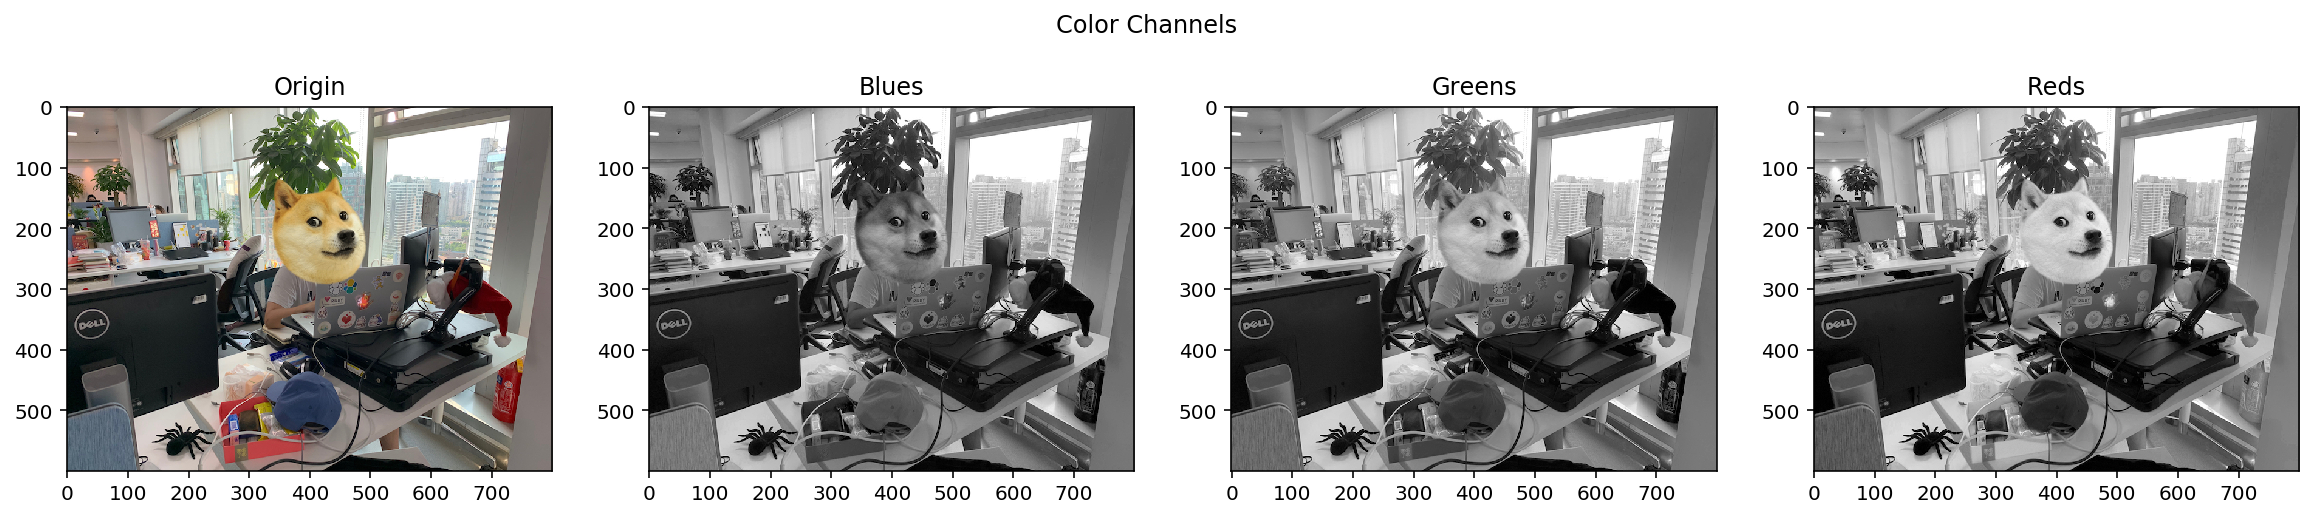

In [6]:
def plot_color_channels(img):
    channels = ['Origin', 'Blues', 'Greens', 'Reds']
    plt.figure();
    fig, ax = plt.subplots(1,4, figsize=(20,4))
    show_BGR_image(img, ax=ax[0])
    ax[0].set_title('Origin')
    for i in range(3):
#         ax[i+1].imshow(img[:,:,i], cmap=channels[i+1]);
        ax[i+1].imshow(img[:,:,i], cmap='gray');
        ax[i+1].set_title(channels[i+1])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fig.suptitle('Color Channels')
    plt.show();
    
plot_color_channels(image);

## 常见的图像操作
- 模糊
- 平滑
- 增强
- 锐化
- 边缘检测
    - [Canny算子](https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html)
- 膨胀

## 图像处理与颜色识别流程
- 矩形框打标
- 边缘检测
- 实体分割
- K-Means聚类

In [7]:
def intensify(img, intensity=2):
    """ 增强（色值）信号
    """
    kernel = np.zeros((3,3))
    kernel[1,1] = intensity
    return cv2.filter2D(img, 0, kernel)

In [8]:
def sharpen(img, sharp_factor=2, sharp_kernel=5):
    """ 边缘锐化
    """
    kernel_size = sharp_kernel ** 2
    kernel = (1 - sharp_factor) * np.ones((sharp_kernel,sharp_kernel)) / (kernel_size - 1)
    kernel_center_loc = int((sharp_kernel - 1)/2)
    kernel[kernel_center_loc, kernel_center_loc] = sharp_factor
    
    return cv2.filter2D(img, 0, kernel)

In [9]:
def blur_img(img, templateWindowSize = 7, searchWindowSize = 21):
    hColor = h = 20
    blur = cv2.fastNlMeansDenoisingColored(img, None,h,hColor,templateWindowSize,searchWindowSize)
    return blur

In [10]:
def get_dilated(edges, dilation=2):
    """ 对边缘灰度图进行膨胀处理
    """
    kernel = np.ones((dilation,dilation),np.uint8)
    dilation = cv2.dilate(edges,kernel,iterations = 2)
    return dilation

In [11]:
def tune_image(templateWindowSize = 7, searchWindowSize = 21, intensity=1, sharp_factor=2, sharp_kernel=5, thresholds=[200, 600], dilation=2, show_edge=False):
    global image
    
    blurred_image = blur_img(image, templateWindowSize, searchWindowSize)
    
    tuned_image = sharpen(intensify(blurred_image, intensity=intensity), sharp_factor=sharp_factor, sharp_kernel=sharp_kernel)
    
    fig, ax = plt.subplots(1, 2, figsize=(20,12))
    ax[0].set_title('Origin')
    ax[1].set_title('Tuned')
    show_BGR_image(image, ax[0])
    
    if show_edge:
        edges = get_dilated(cv2.Canny(cv2.cvtColor(tuned_image, cv2.COLOR_BGR2GRAY), *thresholds), dilation=dilation)
        ax[1].imshow(edges, cmap='gray')
        return
    
    show_BGR_image(tuned_image, ax[1])

In [12]:
widgets.interact(
    tune_image,
    templateWindowSize=widgets.IntSlider(min=1, max=11, value=7, step=2, continuous_update=False),
    searchWindowSize=widgets.IntSlider(min=1, max=25, value=1, step=2, continuous_update=False),
    intensity=widgets.FloatSlider(min=0.3, max=5.0, step=0.05, value=1.0, continuous_update=False),
    sharp_factor=widgets.FloatSlider(min=-2, max=10, step=0.1, value=1, continuous_update=False),
    sharp_kernel=widgets.IntSlider(min=3, max=9, value=3, step=2, continuous_update=False),
    thresholds=widgets.IntRangeSlider(min=0, max=2000, value=[100, 300], continuous_update=False),
    dilation=widgets.IntSlider(min=1, max=8, value=2, step=1, continuous_update=False)
);

interactive(children=(IntSlider(value=7, continuous_update=False, description='templateWindowSize', max=11, mi…